In [22]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Importing cli.csv dataset - Amplitude Adjusted (A Leading indicator for U.S. GDP)
cli = pd.read_csv("cli.csv")
cli = cli.set_index("Date")

gdp = pd.read_csv("gdp.csv")
gdp = gdp.set_index("Date")

In [7]:
# Changing and checking that the `cli.index` was changed to a datetime format
cli.index = pd.to_datetime(cli.index)
type(cli.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
# Changing and checking that the `gdp.index` was changed to a datetime format
gdp.index = pd.to_datetime(gdp.index)
type(gdp.index)

pandas.core.indexes.datetimes.DatetimeIndex

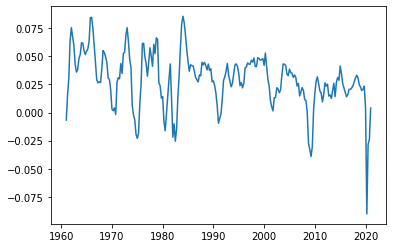

In [9]:
# A quick view at the GDP YoY % change chart
plt.plot(gdp.index, gdp['gdp_%yoy'])
plt.show()

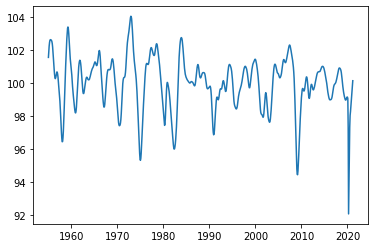

In [10]:
# A quick view at the CLI chart
plt.plot(cli.index, cli['cli'])
plt.show()

In [11]:
# Merging GDP and CLI data 
# Because GDP data is quartely the CLI data has changed from monthly to quarterly data after merging both dataframes
df = pd.merge(gdp, cli, left_index=True, right_index=True)
gdp_cli = df[['gdp_%yoy', 'cli']].copy()

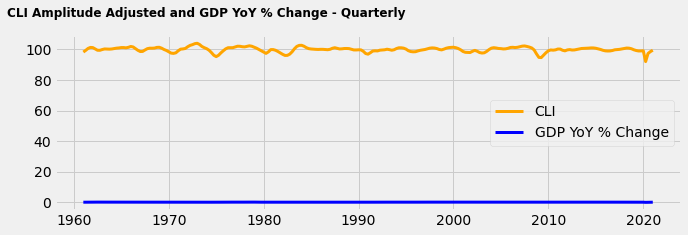

Note:
After viewing this data in a raw format 
we can see the importance of scaling data.


In [12]:
"""Plots line graphs """
# Plot style
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,3)) # chart 2:1

# Sets Title of Plot
ax.set_title("CLI Amplitude Adjusted and GDP YoY % Change - Quarterly", 
             fontsize=12, fontweight='bold', x=.242, y=1.07)

# Line plot of CLI
plt.plot(df.index, df.cli, color='orange', 
         linewidth=3, label="CLI")
plt.plot(df.index, df['gdp_%yoy'], color='blue', 
         linewidth=3, label = "GDP YoY % Change")

# Adding a legend
ax.legend()
plt.show()
print("Note:\nAfter viewing this data in a raw format \nwe can see the importance of scaling data.")

In [13]:
# Importing MinMaxScaler from scikit-learn to transmute the observed data 
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Initializing MinMaxScaler using a range of -1 to 1 because data needs to oscilate around 0
scaler = MinMaxScaler(feature_range=(-1,1))
# Applying scaler to data
scaled_df = scaler.fit_transform(gdp_cli)

In [15]:
# Converting the array back to a DataFrame and using the same column headers and index header
normalized_df = pd.DataFrame(scaled_df, index=gdp_cli.index, columns = gdp_cli.columns)
# Rounding the DataFrame to 3 decimal places
normalized_df.round(3)

,gdp_%yoy,cli
Date,,
1961-01-01,-0.051,0.041
1961-04-01,0.203,0.224
1961-07-01,0.367,0.437
1961-10-01,0.752,0.548
1962-01-01,0.885,0.529
...,...,...
2020-01-01,0.062,0.184
2020-04-01,-1.000,-1.000
2020-07-01,-0.298,-0.121


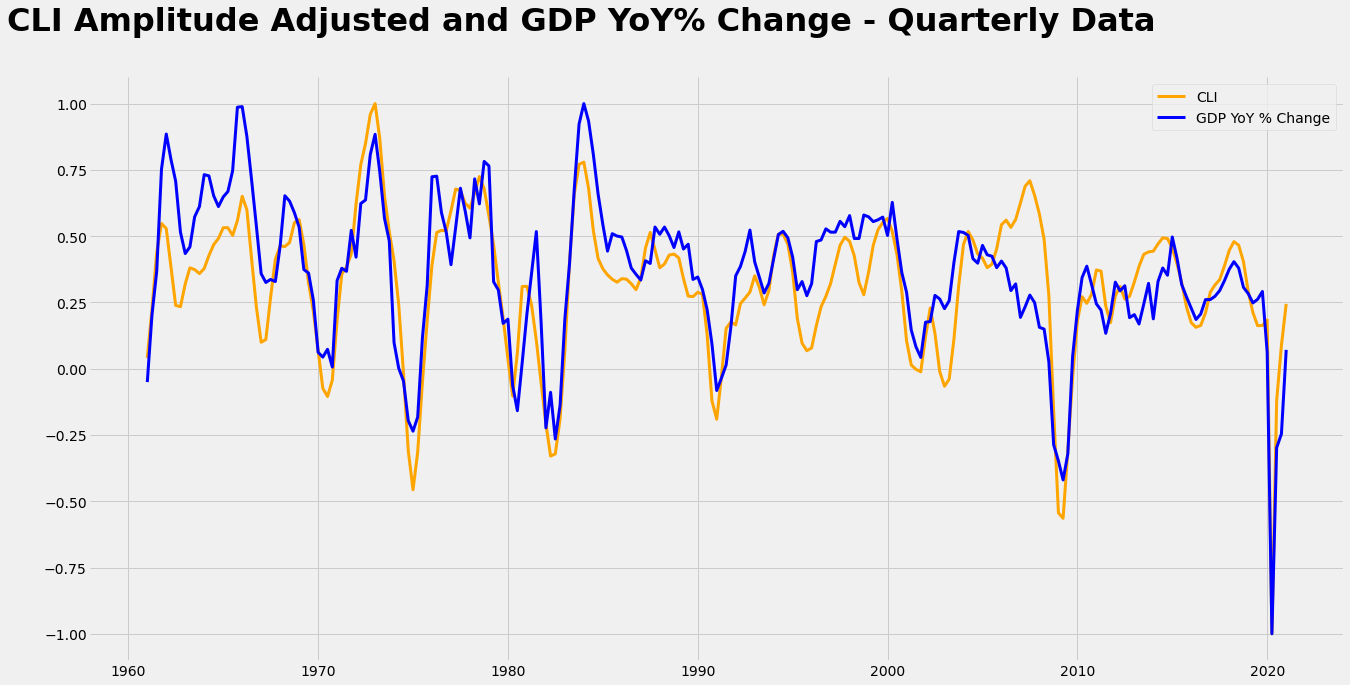

In [23]:
"""Plotting line graphs """
# Plot style
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,10)) # chart size 2:1

# Sets Title of Plot
ax.set_title("CLI Amplitude Adjusted and GDP YoY% Change - Quarterly Data", fontsize=32, fontweight='bold', x=.392, y=1.07)

# Lineplot of CLI
plt.plot(normalized_df.index, normalized_df.cli, color='orange', linewidth=3, label="CLI")
# Lineplot of GDP YoY % Change
plt.plot(normalized_df.index, normalized_df['gdp_%yoy'], color='blue', linewidth=3, label = "GDP YoY % Change")

# Adds a legened
plt.legend(loc="upper right")

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Saving image as a .png file
plt.savefig('GDP_CLI_lineplot.png', transparent=False, dpi=150)

plt.show()

In [24]:
# Looking at the correlation between the two features - CLI and GDP YoY % Change
# To view the correlation table = normalized_df.corr()

# Unpacking scipy.stats.pearsonr()
c, p = scipy.stats.pearsonr(normalized_df['gdp_%yoy'], normalized_df['cli'])
# Printing the Pearson's Correlation and the p-value(statistical significance)
print(f'Correlation: {c}')
print(f'p-value: {p}')

Correlation: 0.8122290857052571
p-value: 7.190068631166001e-58


In [25]:
# Import the estimator class
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression()
model

LinearRegression()

In [26]:
# Create the 2-D features matrix
X = normalized_df['cli']
# Now making it 2-D, previously 1-D
X_cli_2d = X[:, np.newaxis]

# Turning GDP column into a series to plot
y_gdp = normalized_df['gdp_%yoy']
# Checking the shape of the feature matrix - CLI 
X_cli_2d.shape

(241, 1)

In [27]:
# Fit the Linear Regression model
model.fit(X_cli_2d, y_gdp)

LinearRegression()

In [28]:
# Slope (also called the model coefficient) / rounding to 4 decimals
print(f'model coefficient(slope): {model.coef_[0].round(4)}')

# Intercept / rounding to 4 decimals
print(f'y-intercept(constant): {model.intercept_.round(4)}')

# In equation form
print(f'\nGDP yoy% change = {model.coef_[0]} x (CLI) + {model.intercept_}')

model coefficient(slope): 0.8374
y-intercept(constant): 0.0958

GDP yoy% change = 0.8374109799365542 x (CLI) + 0.09582487082072383


In [29]:
# Generate the line from the model coefficients
x_line = np.linspace(-1, 1)
# x_line = np.linspace(170,240)
y_line = model.coef_ * x_line + model.intercept_

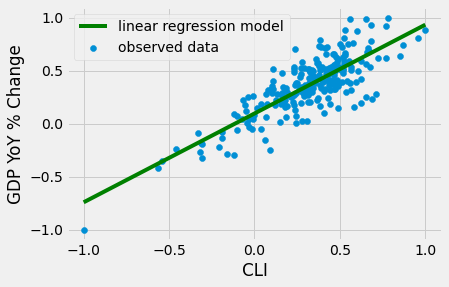

Line Equation: y = (mx) + b
GDP YoY% Change = (0.8374109799365542 x CLI) + 0.09582487082072383


In [30]:
"""Plotting the Linear Regression"""
# Create the figure and axes objects
fig, ax = plt.subplots(1)
ax.scatter(x = X_cli_2d, y = y_gdp, label="observed data")
ax.plot(x_line, y_line, color='g', label="linear regression model")
ax.set_xlabel('CLI')
ax.set_ylabel('GDP YoY % Change')

# Creates Legend for linear regression and observed data
ax.legend(loc="upper left")

# Saving image as a .png file
plt.savefig('GDP_CLI.png', transparent=False, dpi=150)
plt.show()

# In equation form
print("Line Equation: y = (mx) + b")
print(f'GDP YoY% Change = ({model.coef_[0]} x CLI) + {model.intercept_}')

In [225]:
# TODO: Calculate the rate of change of the CLI using monthly data
# TODO: DO the same to headline CPI monthly data